# Price Forecasting: Time Series Analysis and Model Training


### 1. Problem Statement
The energy industry is undergoing a transformative journey, marked by rapid modernization and technological advancements. Infrastructure upgrades, integration of intermittent renewable energy sources, and evolving consumer demands are reshaping the sector. However, this progress comes with its challenges. Supply, demand, and prices are increasingly volatile, rendering the future less predictable. Moreover, the industry's traditional business models are being fundamentally challenged. In this competitive and dynamic landscape, accurate decision-making is pivotal. The industry relies heavily on probabilistic forecasts to navigate this uncertain future, making innovative and precise forecasting methods essential that aids stakeholders in making strategic decisions amidst the shifting energy landscape. 

### 2. Data Ingestion

#### 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib,Scipy and Seaborn

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

#### 2.2 Import the CSV Data as Pandas DataFrame

In [3]:
df_price = pd.read_csv('../../dataset/Price forecasting/Price Forecasting data upto December 24.csv', sep=',')

### 3. Data Preprocessing and Data Visualization

#### 3.1 Show top 5 records


In [4]:
df_price.head()

,Delivery Day,Hours,Prices\n(EUR/MWh)
0,1/1/2020,H1,26.38
1,1/1/2020,H2,26.50
2,1/1/2020,H3,27.01
3,1/1/2020,H4,27.40
4,1/1/2020,H5,27.99


#### 3.2 Shape of Dataset


In [6]:
df_price.shape

(35352, 3)

#### 3.3 Dataset Information
<li>Delivery Day: Represents date</li>
<li>Hours: Represents Specific Hour of Day</li>
<li>Prices\n(Eur/MWh): Represents price of electricity in Euro per megawatt of electricity</li>

#### 3.4 Descriptive Statistics

In [8]:
df_price.describe()

,Prices\n(EUR/MWh)
count,34896.000000
mean,132.958000
std,120.249844
min,-35.000000
25%,47.987500
50%,95.440000
75%,179.237500
max,1047.100000


#### 3.5 Dealing with missing values


Checking NaN values

In [9]:
df_price.isna().sum()

Delivery Day         456
Hours                456
Prices\n(EUR/MWh)    456
dtype: int64

Dropping rows having values NaN

In [12]:
df_price.dropna(how='all', inplace=True)
df_price.isna().sum()

Delivery Day         0
Hours                0
Prices\n(EUR/MWh)    0
dtype: int64

#### 3.6 Dealing with Inconsistent Datas

<p>From descriptive statistics analysis, minimum value of price is found to be negative which concludes there are some negative values of price which makes no sense.</p>

<li>Checking For Negative or Zero Prices</li>

In [15]:
df_price[df_price['Prices\n(EUR/MWh)']<=0]

,Delivery Day,Hours,Prices\n(EUR/MWh)
1229,2/21/2020,H6,0.00
1230,2/21/2020,H7,0.00
1231,2/21/2020,H8,0.00
1232,2/21/2020,H9,0.00
1233,2/21/2020,H10,-5.00
...,...,...,...
34453,12/6/2023,H14,-21.44
34454,12/6/2023,H15,-22.58
34455,12/6/2023,H16,-18.47
34456,12/6/2023,H17,-5.72


<li>Replacing Negative or Zero Prices with NaN</li>

In [18]:
mask = df_price['Prices\n(EUR/MWh)'] <= 0
df_price.loc[mask, 'Prices\n(EUR/MWh)'] = np.nan

<li>Using linear interpolation to fill NaN Values</li>

In [23]:
df_price['Prices\n(EUR/MWh)'].interpolate(inplace=True)

#### 3.7 Removing Outliers

In [31]:
zscore = scipy.stats.zscore(df_price['Prices\n(EUR/MWh)'])
df_price = df_price[abs(zscore)<5]

#### 3.8 Datetime Parsing

<li>Merging Delivery day and Hours columns as Datetime for making Time series analysis easy.</li>

In [61]:
timeMap = {
    f'H{i+1}': f'{i:02d}' for i in range(0, 24)
}

In [62]:
df_price.loc[:, "Time"] = df_price["Hours"].apply(lambda x: timeMap[x] + ":00:00")

In [63]:
df_price.loc[:, 'Datetime'] = df_price['Delivery Day'] + ' ' + df_price['Time']

<li>Changing data type of Datetime values to Timestamp</li>

In [64]:
df_price.loc[:, 'Datetime'] = pd.to_datetime(df_price['Datetime'])

<li>Making Datetime Column as index</li>

In [65]:
df_price.set_index('Datetime', inplace=True)

<li>Dropping Time Column</li>

In [67]:
df_price.drop('Time', axis=1, inplace=True)

In [68]:
df_price

,Delivery Day,Hours,Prices\n(EUR/MWh)
Datetime,,,
2020-01-01 00:00:00,1/1/2020,H1,26.38
2020-01-01 01:00:00,1/1/2020,H2,26.50
2020-01-01 02:00:00,1/1/2020,H3,27.01
2020-01-01 03:00:00,1/1/2020,H4,27.40
2020-01-01 04:00:00,1/1/2020,H5,27.99
...,...,...,...
2023-12-24 19:00:00,12/24/2023,H20,71.09
2023-12-24 20:00:00,12/24/2023,H21,62.01
2023-12-24 21:00:00,12/24/2023,H22,53.41


#### 3.9 Visualizing Datas

<li>Time Series analysis of Daily Price</li>

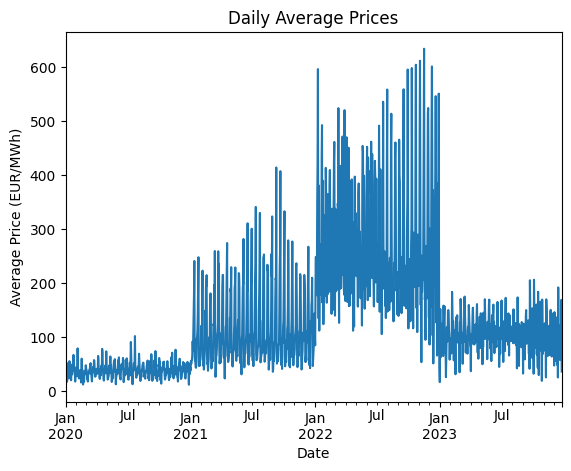

In [92]:
df_price['Prices\n(EUR/MWh)'].resample('D').mean().plot()
plt.xlabel('Date')
plt.ylabel('Average Price (EUR/MWh)')
plt.title('Daily Average Prices')
plt.show()

<li>Time Series Analysis of Weekly Price</li>

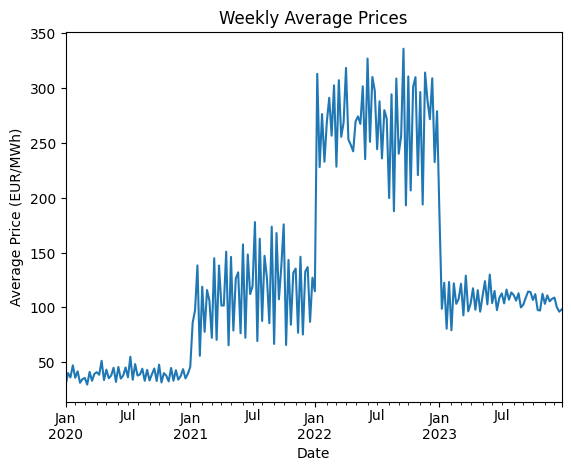

In [90]:
df_price['Prices\n(EUR/MWh)'].resample('W').mean().plot()
plt.xlabel('Date')
plt.ylabel('Average Price (EUR/MWh)')
plt.title('Weekly Average Prices')
plt.show()

<li>Time Series Analysis of Monthly Price</li>

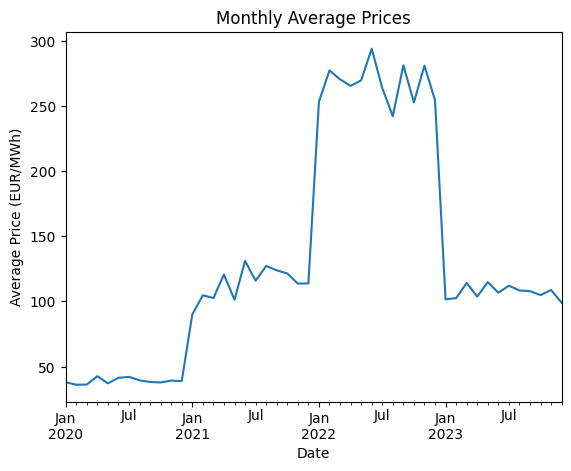

In [91]:
df_price['Prices\n(EUR/MWh)'].resample('M').mean().plot()
plt.xlabel('Date')
plt.ylabel('Average Price (EUR/MWh)')
plt.title('Monthly Average Prices')
plt.show()


<li>Average Prices of electricity for each hour of day</li>

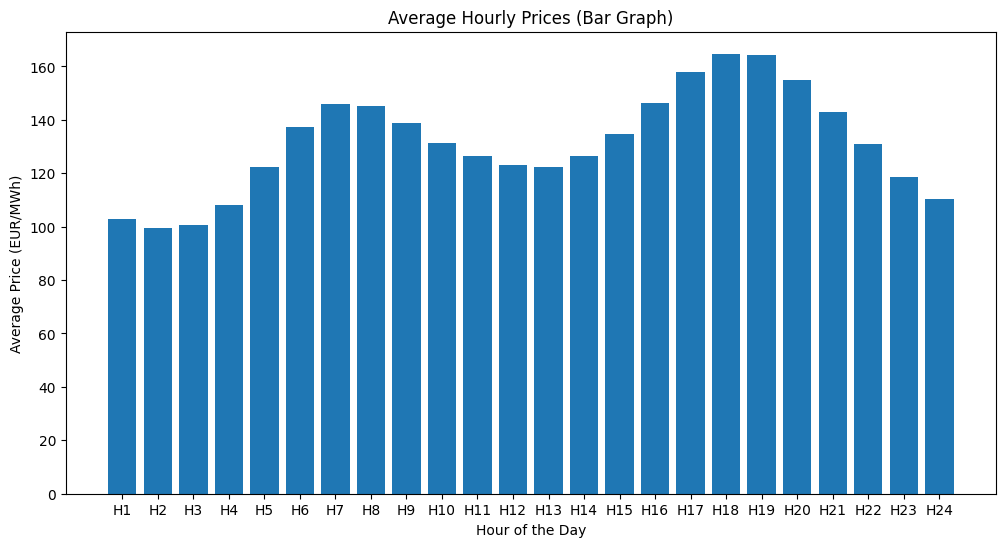

In [93]:
hour_order = [f'H{i}' for i in range(1, 25)] 

# Group by the 'Hours' column and calculate the mean for each group
hourly_average = df_price.groupby('Hours')['Prices\n(EUR/MWh)'].mean()

plt.figure(figsize=(12, 6))

# Plot a bar graph
plt.bar(hour_order, hourly_average.reindex(hour_order))
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price (EUR/MWh)')
plt.title('Average Hourly Prices (Bar Graph)')
plt.show()

### 4 Feature Engineering
#### 4.1 Data Normalization